In [3]:
# import the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score


In [4]:
# Load the data
df = pd.read_csv("C:\\Datasets\\German Bank\\german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
# Check out some info on the data and some basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
# Drop the Unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
df['Saving accounts'] = df['Saving accounts'].fillna( 'little')

In [12]:
df['Checking account'] = df['Checking account'].fillna('little')

In [13]:
# Check to resolve if indeed we solved the Null values issue
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [14]:
df.shape

(1000, 9)

In [15]:
# A simple function that returns the most frequent in all columns
def most_frequent(column,df=df):
    """This function returns the most appearing values in a column
    Its  based on the idea of value counts """
    print(f"The most frequent item in {column} ||column")
    print('************************************')
    print(f"  { df[column].value_counts().head(20)}")

In [16]:
# For all columns now ,lets begin with a single column say Age Column
most_frequent('Age')

The most frequent item in Age ||column
************************************
  27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
Name: Age, dtype: int64


In [17]:
# Now I will do it for all columns except Age
for column in df.drop(['Age'],axis=1):
    most_frequent(column)

The most frequent item in Sex ||column
************************************
  male      690
female    310
Name: Sex, dtype: int64
The most frequent item in Job ||column
************************************
  2    630
1    200
3    148
0     22
Name: Job, dtype: int64
The most frequent item in Housing ||column
************************************
  own     713
rent    179
free    108
Name: Housing, dtype: int64
The most frequent item in Saving accounts ||column
************************************
  little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
The most frequent item in Checking account ||column
************************************
  little      668
moderate    269
rich         63
Name: Checking account, dtype: int64
The most frequent item in Credit amount ||column
************************************
  1478    3
1262    3
1258    3
1275    3
1393    3
1442    2
3590    2
2578    2
701     2
1924    2
2039    2
4526    2
3349

In [18]:
# CHECK THE DATATYPES
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

# DATA ANALYSIS :: GERMAN BANK  DATA STORY 

In [19]:
# The visualizations will be made by seaborn and so I will create a plotter class to avoid repetition of code
class CreditVisualizer():
    """The CreditVisualizer takes in our dataframes and generates plots based on the methods called
    Args : 
    x -str :This is the independent variable column ,in cases where there are more than two columns
    y-str :This is the dependent variable column usually ,logic or reasoning is used to determine the relationship
    df : DataFrame : The parent dataframe on which we  get all our variable i.e. Dependent and Independent
    fig = This is an instance of the plt.figure which you can set and takes figure size(Figure Dimensions)
    *Methods* 
    histogram : Returns a Plotted histogram ,histogram need one variable i.e they show frequency by count\
    countplot : A countplot return the total number of each variable in a column 
    barplot : A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication ofthe uncertainty around that estimate using error bars. Bar plots include 0in the quantitative axis range, and they are a good choice when 0 is ameaningful value for the quantitative variable, and you want to makecomparisons against it.(seaborn documentation)
    pairplot : Models the relationship among all numerical columns
    
    Returns :
    
    """
    def __init__(self,df,fig):
        self.df= df
        self.fig = fig
    def histogram(self,x):
        #fig= fig
        sns.histplot(x=x,data=df)
        plt.xlabel(x)
        plt.ylabel('Frequency')
        plt.show()
    def countplot(self,x,data):
        #fig=fig
        sns.countplot(x,data=df)
        plt.xlabel(x)
        plt.title(f"Countplot showing the distribution of {x}")
    def barplot(self,x,y,data):
        #fig=fig
        sns.barplot(x=x,y=y,data=df)
        plt.xlabel(x)
        plt.ylabel('Frequency')
        plt.show()
    def pairplot(self,df):
        #fig=fig
        sns.pairplot(df)
        plt.show()
    def jointplot(self,x,y,data):
        sns.jointplot(x=x,y=y,data=df)
        plt.title(f"The jointplot of {x} vs {y}")
        

In [20]:
plotter = CreditVisualizer(df=df,fig=plt.figure(figsize=(20,8)))

<Figure size 2000x800 with 0 Axes>

In [21]:
help(plotter)

Help on CreditVisualizer in module __main__ object:

class CreditVisualizer(builtins.object)
 |  CreditVisualizer(df, fig)
 |  
 |  The CreditVisualizer takes in our dataframes and generates plots based on the methods called
 |  Args : 
 |  x -str :This is the independent variable column ,in cases where there are more than two columns
 |  y-str :This is the dependent variable column usually ,logic or reasoning is used to determine the relationship
 |  df : DataFrame : The parent dataframe on which we  get all our variable i.e. Dependent and Independent
 |  fig = This is an instance of the plt.figure which you can set and takes figure size(Figure Dimensions)
 |  *Methods* 
 |  histogram : Returns a Plotted histogram ,histogram need one variable i.e they show frequency by count    countplot : A countplot return the total number of each variable in a column 
 |  barplot : A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and pro

# AGE 

In [22]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

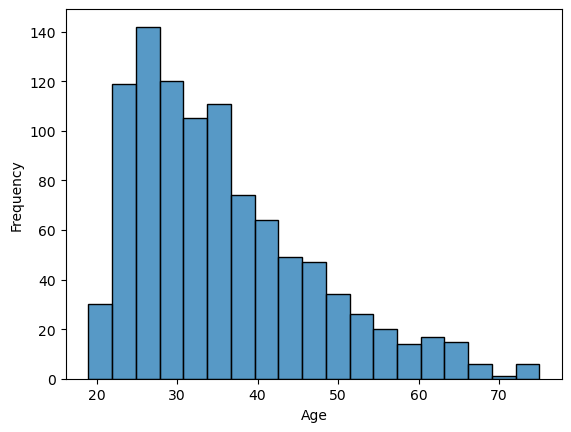

In [23]:
plotter.histogram('Age') # A Majority of the customers are aged between Age 20 - 30 ,its a youthful market

In [24]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

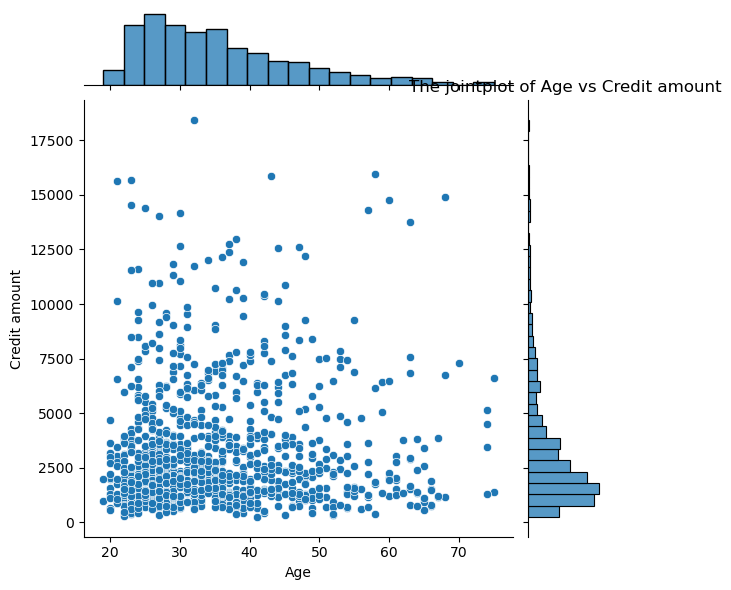

In [25]:
# Relationship between Age and Credit amount ,what age borrows how much
plotter.jointplot(x='Age',y='Credit amount',data=df) # Seems as if the elder someone gets the less they borrow

# BUILDING A SUPERVISED LEARNING MODEL FROM SCRATCH ::

I have this Idea that since we are not given labels , I could come up with a set of rules to determine if a customer gets a loan or not . The criterion is based off logic ,with conditions  such Age and Purpose coming into play.

In [26]:
df.columns # Checking for the columns in our  dataset

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [27]:
len(df)

1000

In [28]:
df.Age.values

array([67, 22, 49, 45, 53, 35, 53, 35, 61, 28, 25, 24, 22, 60, 28, 32, 53,
       25, 44, 31, 48, 44, 48, 44, 26, 36, 39, 42, 34, 63, 36, 27, 30, 57,
       33, 25, 31, 37, 37, 24, 30, 26, 44, 24, 58, 35, 39, 23, 39, 28, 29,
       30, 25, 31, 57, 26, 52, 31, 23, 23, 27, 50, 61, 25, 26, 48, 29, 22,
       37, 25, 30, 46, 51, 41, 40, 66, 34, 51, 39, 22, 44, 47, 24, 58, 52,
       29, 27, 47, 30, 28, 56, 54, 33, 20, 54, 58, 61, 34, 36, 36, 41, 24,
       24, 35, 26, 39, 39, 32, 30, 35, 31, 23, 28, 25, 35, 47, 30, 27, 23,
       36, 25, 41, 24, 63, 27, 30, 40, 30, 34, 29, 24, 29, 27, 47, 21, 38,
       27, 66, 35, 44, 27, 30, 27, 22, 23, 30, 39, 51, 28, 46, 42, 38, 24,
       29, 36, 20, 48, 45, 38, 34, 36, 30, 36, 70, 36, 32, 33, 20, 25, 31,
       33, 26, 34, 33, 26, 53, 42, 52, 31, 65, 28, 30, 40, 50, 36, 31, 74,
       68, 20, 33, 54, 34, 36, 29, 21, 34, 28, 27, 36, 40, 52, 27, 26, 21,
       38, 38, 43, 26, 21, 55, 33, 45, 50, 66, 51, 39, 31, 23, 24, 64, 26,
       23, 30, 32, 30, 27

In [32]:
# Create a function that returns loan award,I'll name it loan :
# loan column will be the label column ,with two values 0 and 1
def get_label(df):
    loan_award = []
    for i in range(len(df)):
        for value in df.Age.values:
            if value > 60:
                loan_award == 1
            else :
                loan_award == 2
        loan_award.append(loan_award)
    return loan_award
        

In [33]:
df['loan'] = get_label(df)